# Numerical Methods
___
Adding some tools to our toolbox

Aim of this unit will be to help us understand how we go from thinking about things fully theoretically, to making them numeric.

* In this way we'll lose some generality, as we won't be able to think about things abstractly
* But we'll also gain a whole bunch of concrete detail


In general, as part of my process, I tend to always start out with fully analytical models:
* This is where you figure out the moving parts
* What are inputs/outputs
* What's the objective here, etc

But at some point the model either gets too complicated to solve, or I'm trying move the model to data to estimate things concretely, at which point we move from having a theoretical model on a piece of paper, to trying to get this model to engage with numbers

Today we'll go through ways to mirror some of the analysis skills we've used in the theory sections, but within the computer.

To do this, we'll switch from analytical representations, into numerical, and detail what we gain from this, and what we need to be concerned with

# Numerical Methods
Our aims is to go over some three key numerical tools:
1. Numerical derivatives
2. Numerical solutions to equations
3. Numerical Optimization

I'm going to go a little out of order though in that I want to do one thing on solving equations first...

## Linear Equations
Suppose that we have a simple system of equations:
$$ \begin{array}{rcl} 2 x_1+ 3 x_2 & = & 6 \\  x_1+ x_2 & = & 2 \end{array}$$

You probably solved this type of equation in high school... 

...and you can probably figure this one out almost in your head



So the unique solution to this is:
$$ \begin{array}{rcl} x_1 & = & 0 \\  x_2 & = & 2 \end{array}$$

While we probably didn't need it, we could have represented that equation as a linear system:
$$\begin{array}{rcl} 2 x_1+ 3 x_2 & = & 6 \\  x_1+ x_2 & = & 2 \end{array} \Rightarrow \left[ \begin{array}{cc}
 2 & 3 \\ 
 1 & 1 \end{array}\right] 
 \left(\begin{array}{c}x_1\\x_2\end{array}\right)= \left(\begin{array}{c}6\\2\end{array}\right)
 $$
 
So the linear equation system is $\mathbf{A}\mathbf{x}=\mathbf{c}$


So this such linear systems can easily be solved by using matrix inverses:
$$\left(\begin{array}{c}x_1\\x_2\end{array}\right)= \mathbf{A}^{-1} \mathbf{c}$$

* Each row of $\mathbf{A}$ and $\mathbf{c}$  represents a particular equation. 
* Each column in $\mathbf{A}$ represents the contributed effect from each of the underlying variables in $\mathbf{x}$, the things we're trying to solve for 

In [15]:
A <- rbind( c(2,3),c(1,1) )
c <- rbind( c(6),c(2) )

In [16]:
solve(A)%*%c

0
2


While this example we could have done more quickly by hand, once the number of equations becomes large, linear algebra becomes very useful.

Implicitly, you've been using the benefits of this in the last semseter, because you were trying to minimize the total sum of squares for a regression model
$$ \sum_i\left(y_{i}-(\beta_0+\beta_1 x_{i,1}+\ldots +\beta_k x_{i,k})\right)^2 $$

Taking first-order conditions to try to get each term minimized led to $k+1$ equations in the $k+1$ unknowns (the $\beta$ terms)

It's possible to make the above simpler to represent $\mathbf{y}$ and $\boldsymbol{\beta}$ as vectors, and $\mathbf{X}$ as the $n\times (k+1)$ data matrix.

At the end of the day though, the first-order conditions imply a system of linear equations:
$$\mathbf{A} \hat{\boldsymbol{\beta}}=\mathbf{c}$$
(where the additional structure told us that $\mathbf{A}=\mathbf{X}^T\mathbf{X}$ and $\mathbf{c}=\mathbf{X}^T\mathbf{y}$)

The benefit of being able to solve linear equations is that we got a nice analytical expression for the estimates:
$$ \hat{\boldsymbol{\beta} }= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$

The point of this is:
* Some brief review of linear algebra
* Solving linear equations is mechanical so long as you've got the right numbers of unknowns and equations
* In the OLS model where we optimized to **minimize** the sum of squares, the output formula was easy to work with

# Numerical Methods
So, having gone over a very simple set of equations, let's come back to option 1 here.
1. Numerical derivatives
2. Numerical solutions to equations
3. Numerical Optimization

## Analytical Derivatives
### Easy Ones
Sometimes it is trivial for us to take take a derivative, for example:
$$ f(x)=a x^2+b x+c$$
where we can say that:
$$ f^\prime(x)=2 a x+b $$

### Medium Ones
Othertimes, we can probably solves something, it just takes us a bit longer:
$$ g(x)=(a x^2+b x+c)\cdot e^{-\lambda x}$$
where we can say that:
$$ f^\prime(x)=-\lambda e^{-\lambda x}(a x^2 +bx +c)+e^{-\lambda x}(2ax+b)$$

### Hurt-Your-Head Ones
And still other times, it's just not worth really thinking about the analytical formula...

For me this is basically anything with a triple product, or any type of harmonic term, but to make things concrete, consider:

$$ f(x)=\sqrt{x^2 e^{\sin(x)}+\Phi(x \cdot \log(x+1))}$$

It's not to say that this can't be solved, where the analytical derivative is:
$$ f^\prime(x)=\frac{-\frac{x e^{-\frac{1}{2} x^2 \log ^2(x+1)} \log (x+1) (x+(x+1) \log (x+1))}{\sqrt{2 \pi } (x+1)}+x^2 e^{\sin (x)} \cos (x)+2 x e^{\sin (x)}}{2 \sqrt{\frac{e^{-\frac{1}{2} x^2 \log ^2(x+1)}}{\sqrt{2 \pi }}+x^2
   e^{\sin (x)}}}$$

The issue is that the amount of time we might dedicate to solving this one experession likely isn't worth it. Instead, we'll just go back to the definition of a derivative, and try and get a numerical approximation to it.

In fact, I just solved this with Mathematica (a symbolic algebra packagae). The point here is that the amount of time you should dedicate into getting an analytical expression is only as good as what you'll use it for...

* Would knowing the formula for $f^\prime(x)$ save me time?
* Would it be more accurate?
* Would it give be a better understanding into the nature of the problem?

## Graidents & Derivatives
### Discrete changes
A lot of the time when we're thinking about changes, it's usually a discrete quantity change $$x\mapsto x+\Delta x$$ 
and we're interested in the ensuing effect on another variable $$y=f(x)\mapsto f(x+\Delta x)=f(x)+\Delta y.$$

We can think of the underlying gradient as the ratio of the movements $$ \frac{\Delta y}{\Delta x}=\frac{f(x+\Delta x)-f(x)}{\Delta x} $$

### Derivatives
As we make the change in $x$ smaller and smaller, this gradient approaches the derivative:
$$\tfrac{d}{dx}y= \lim_{\Delta x\rightarrow 0} \frac{f(x+\Delta x)-f(x)}{\Delta x}$$
The derivative tells us the ratio of the changes when the input change is infinitesimally small

Rather than the exact limit, we can therefore try to numerically approximate the derivative by a using a very small value of the input change $\Delta x$. 

* That is, we will choose $\Delta x$ to be suitably small number $\epsilon$

* However, we can't make $\epsilon$ too small, as we can get into problems with how computers store numbers!

### Coding it up
Let's go back to out simplest example $f(x)=a x^2+b x+c$,
but where we make the problem exact by setting $a=2$, $b=-10$ and $c=3$

So:
* $f(x)=2 x^2- 10 x+3$
* $ f^\prime(x)=4 x-10$

Let's code up an example, of  out derivative approximation:

In [17]:
# Define a numerical derivative function in R
num.deriv <- function(f, x, eps ) { 
    # this function  has THREE inputs to it:
    # (function f, point of derivative x, small change eps)
    (f(x+eps)-f(x))/eps
}
# Define the function we're interested in taking derivatives of
easy.f<- function(x) {
    2*x**2-10*x+3 
}
# Define the actual derivative
d.easy.f<- function(x) {
    4*x-10
}

In [18]:
# Take Numerical Derivatives!
eps <- 1e-7
# Use the function we created
nd <- num.deriv(easy.f,3,eps)
ad <- d.easy.f(3)
err <- nd-ad
# Output it as three separate columns
rbind(nd,ad,err)

nd,2.000000e+00
ad,2.000000e+00
err,2.010079e-07


## Another Example
Let's go back to our medium-hard example where we'll just take the product of our previous quadratic function with an exponential function (that decays here)

$$\left(2 x^2- 10 x+3 \right)e^{-x/10}$$


In [13]:
# Define the medium-hard function as an R *function*
med.f<-function(x) { 
 easy.f(x)*exp(-x/10)
}
# Analytical derivative
d.med.f<-function(x) {
    -0.1*exp(-0.1*x)*easy.f(x)+exp(-0.1*x)*(2*2*x-10)
}

In [19]:
# Take Numerical Derivatives!
eps <- 1e-5
nd <- num.deriv(med.f,3,eps)
ad <- d.med.f(3)
err <- nd-ad
rbind(nd,ad,err) 

nd,2.148386e+00
ad,2.148373e+00
err,1.300134e-05


### Define some colors for graphing
I took these from the [Pitt Brand Identity website](https://www.brand.pitt.edu/visual-identity)

In [20]:
Pitt.Blue <- "#003594"
Pitt.Gold <- "#FFB81C"
Pitt.DGray <- "#75787B"
Pitt.Gray <- "#97999B"
Pitt.LGray <- "#C8C9C7"

## Draw a graph of the function in R
(I'm going to draw a few graphs, so I'm going to define the base plot environment first )

In [21]:
library("ggplot2")
library("repr") # here i'm just loading a package to format the output
options(repr.plot.width=10, repr.plot.height=10/1.68)
base <- ggplot() +aes()+ theme( panel.background = element_rect(fill = "white", linewidth = 0.5, linetype = "solid"),
  panel.grid.major = element_line(linewidth = 0.5, linetype = 'solid', colour =Pitt.Gray), 
  panel.grid.minor = element_line(linewidth = 0.25, linetype = 'solid', colour = "white")
  )  

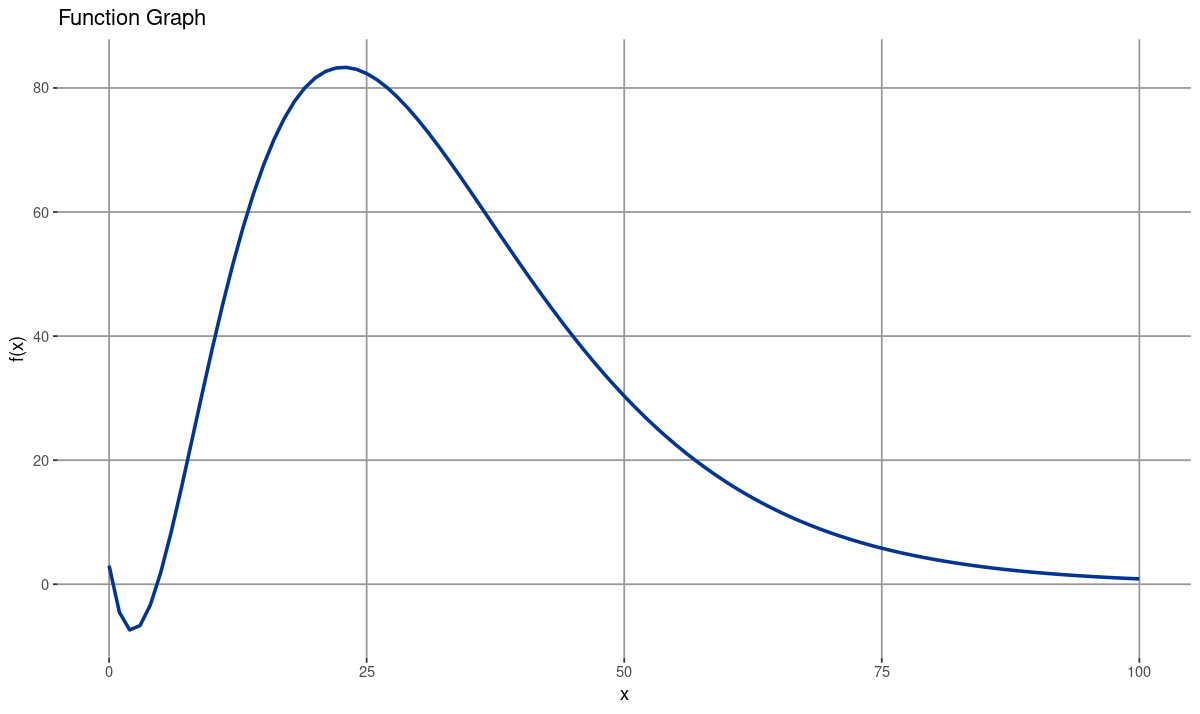

In [22]:
base + geom_function(fun = med.f,colour=Pitt.Blue,  linewidth=1)+  xlim(0, 100) +
ggtitle("Function Graph") + xlab('x') +ylab('f(x)')

In [23]:
# Let's create a numerical derivative for every x from 0 to 100
x.range <- c(0:100)
nd.med.f<- num.deriv( med.f,x.range,1e-5)


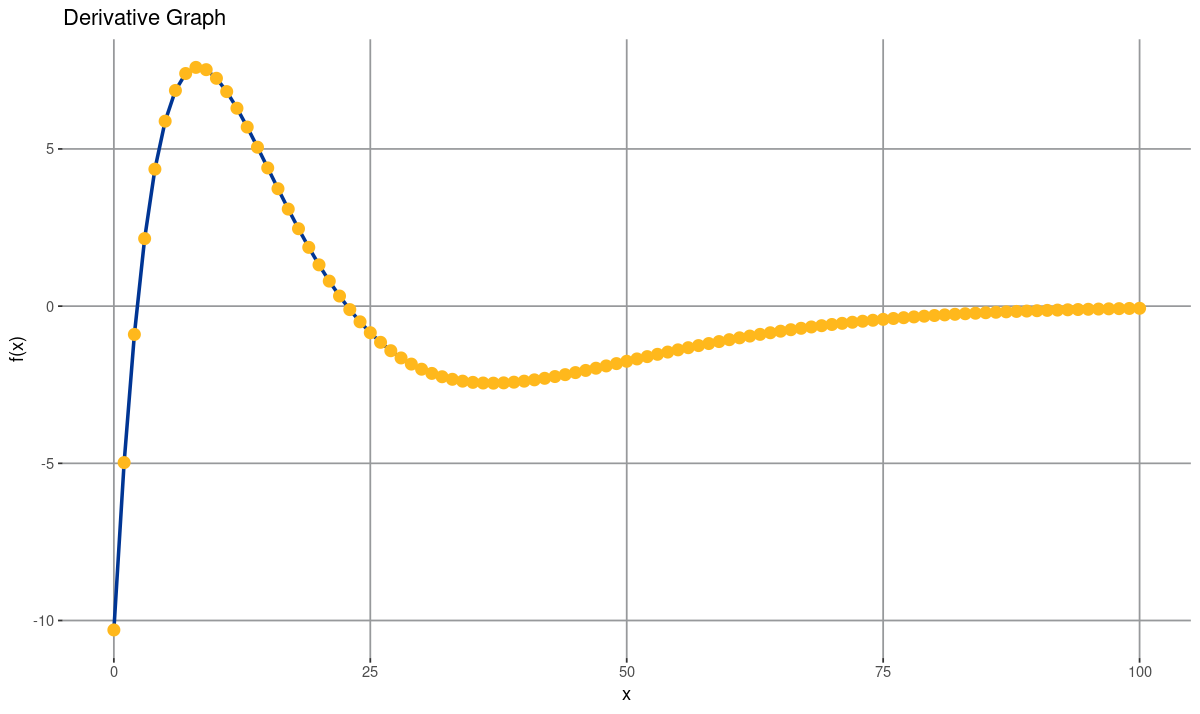

In [28]:
# Draw the graphs:
base+ geom_function(fun = d.med.f, colour=Pitt.Blue, linewidth=1)+ # Draw the analytical derivative
ggtitle("Derivative Graph") + xlab('x') +ylab('f(x)')+ xlim(0, 100) +
# Layer the numerical approximations on top as points!
geom_point(color=Pitt.Gold,size=3,aes(y=nd.med.f,x=x.range) )

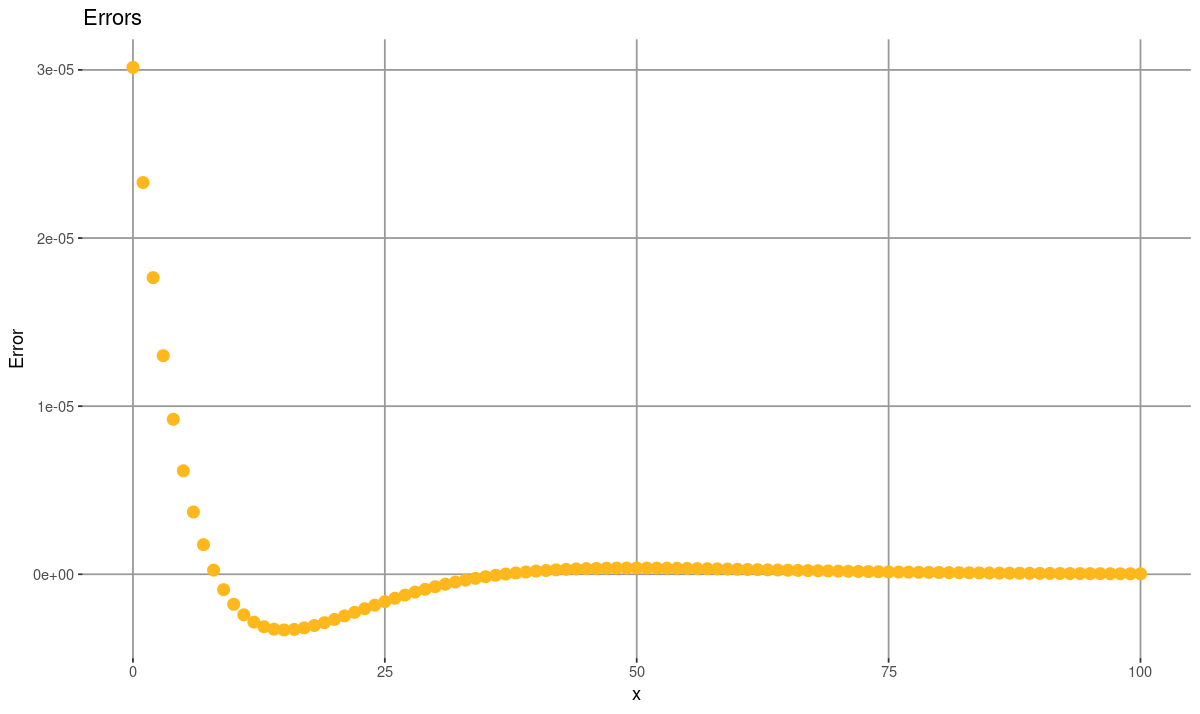

In [38]:
# We can graph the errors (the difference) to check they are small:
nd.med.f.error<- nd.med.f - d.med.f(x.range) # numerical - actual
base+ aes(x=x.range,y=nd.med.f.error)+geom_point(size=3,color=Pitt.Gold)+xlim(0, 100) +
ggtitle("Errors") + xlab('x') +ylab('Error')


## What about higher-order derivatives ?

Suppose that we want to get a numerical version of the second derivative $\tfrac{d^2}{dx^2}f(x)$.

One way would be to just define this via the iterated procedure, where the second derivative is just the derivative of the derivative...

So we want to try and approximate: 
$$\tfrac{d^2}{dx^2}f(x)=\tfrac{d}{dx}f^\prime(x)= \lim_{\Delta x\rightarrow 0} \frac{f^\prime(x+\Delta x)-f^\prime(x)}{\Delta x}$$
through a small increment $\epsilon$


And we could plug in  numerical approximation for the derivative at $x$:
$$f^\prime_\epsilon(x)= \frac{f(x+\epsilon)-f(x)}{\epsilon}$$

and at $x$
$$f^\prime_\epsilon(x+\epsilon)= \frac{f(x+2\epsilon)-f(x+\epsilon)}{\epsilon}$$

One approximation for the second-derivative would then be to look at how the numerical slope of $f(x)$ changes across the increment $\epsilon$:
$$f^{\prime\prime}_\epsilon(x)= \frac{f^\prime(x+\epsilon)-f^\prime(x)}{\epsilon}$$

Where if you went through the prior formulas you'd find that this approximation is actually:
$$f^{\prime\prime}_\epsilon(x)=\frac{f(x+2\epsilon)-2 f(x+\epsilon)+f(x)}{\epsilon^2 }$$

In [39]:
# Coding this up as a formula we get 
num.deriv.2 <- function(f, x, eps ) {
    ( f(x+2*eps)-2*f(x+eps) +  f(x)  )/(eps**2)
}

Thinking back to our easy formula as a test for this, what's the second derivative of:
$$ 2 x^2- 10 x+3 $$

In [42]:
num.deriv.2(easy.f,2,1e-4)

[1] 4

## How can we generate formulas for these approximations?
___
## Are there better, more accurate formulas?

One way to think through this procedure is to consider the **Taylor expansion** of the function around the point $x$ for any deviation $\Delta x$
$$f(x+\Delta x)=f(x)+\frac{f^\prime(x)}{1!}\Delta x+\frac{f^{\prime\prime}(x)}{2!}\Delta x^2+\frac{f^{\prime\prime\prime}(x)}{3!}\Delta x^3+\ldots$$

### Taylor Expansion
$$f(x+\Delta x)=f(x)+\frac{f^\prime(x)}{1!}\Delta x+\frac{f^{\prime\prime}(x)}{2!}\Delta x^2+\frac{f^{\prime\prime\prime}(x)}{3!}\Delta x^3+\ldots$$

Let $\Delta x$ be our small increment $\epsilon$ in the numerical derivative formula, raising $\epsilon$ to increasing powers makes each of the successive terms even smaller,
$$f(x+\epsilon)=f(x)+\frac{f^\prime(x)}{1!}\epsilon+\frac{f^{\prime\prime}(x)}{2!}\epsilon^2+\frac{f^{\prime\prime\prime}(x)}{3!}\epsilon^3+\ldots$$

So our formula for the derivative was giving us:
$$\frac{f(x+\epsilon)-f(x)}{\epsilon}=f^\prime(x) + \frac{f^{\prime\prime}(x)}{2!}\epsilon + \frac{f^{\prime\prime\prime}(x)}{3!}\epsilon^2+\ldots $$

Which if $\epsilon$ is really small relative to the higher order derivatives is:
$$\frac{f(x+\epsilon)-f(x)}{\epsilon}= f^\prime(x) + O(\epsilon)$$

Similarly, let's apply this reasoning to our formula for the second derivative.
$$\frac{f(x+2\epsilon)-2 f(x+\epsilon)+f(x)}{\epsilon^2 } $$
so we need to figure out what the $f(x+2\epsilon)$ terms is from the Taylor expansion

$$f(x+2\epsilon)=f(x)+2 f^\prime(x)\epsilon +2f^{\prime\prime}(x)\epsilon^2+8\frac{f^{\prime\prime\prime}(x)}{6}\epsilon^3+\ldots$$


The second-derivative is therefore giving us:
$$\frac{f(x+2\epsilon)-2 f(x+\epsilon)+f(x)}{\epsilon^2 }= f^{\prime\prime}(x)+\tfrac{7}{6}f^{\prime\prime\prime}(x)\epsilon +\ldots=f^{\prime\prime}(x)+O(\epsilon)$$

### Taylor Expansion
The same thinking on the Taylor expansion, can help us think through potentially better approximations.
\begin{aligned}
f(x+\epsilon) &=f(x)+f^\prime(x)\epsilon+f^{\prime\prime}(x)\frac{\epsilon^2}{2}+f^{\prime\prime\prime}(x)\frac{\epsilon^3}{3!}+\ldots \\
f(x)&=f(x) \\
f(x-\epsilon) &=f(x)-f^\prime(x)\epsilon+f^{\prime\prime}(x)\frac{\epsilon^2}{2}-f^{\prime\prime\prime}(x)\frac{\epsilon^3}{3!}+\ldots
\end{aligned}

If we use both a forward and a backward increment to  generate what is called a *centered difference* equation we get:
$$\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}=f^\prime(x)+O(\epsilon^2)$$
Where this is a more accurate approximation of the derivative at $x$

In [43]:
## Define a better numerical derivative 
c.num.deriv <- function(f, x, eps ) {
    (f(x+eps)-f(x-eps))/(2*eps)
}

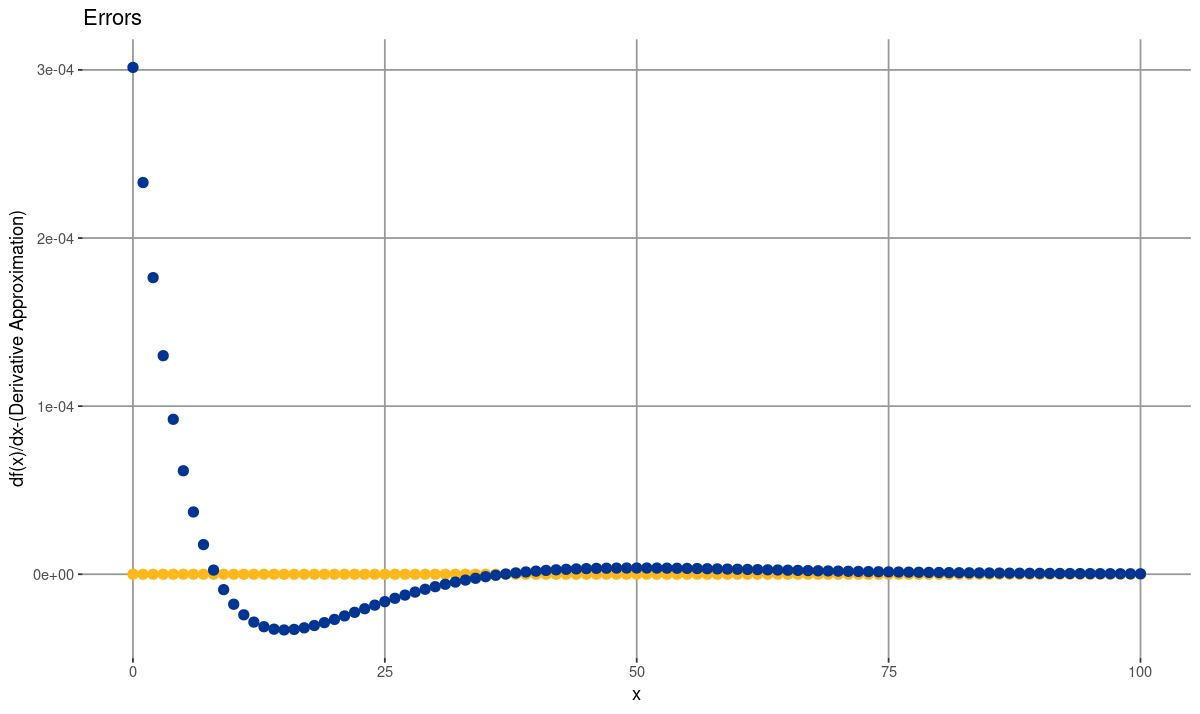

In [44]:
# Calculate the centered derivative for our medium function
c.nd.med.f<- c.num.deriv(med.f,x.range,1e-4)
nd.med.f<- num.deriv(med.f,x.range,1e-4)
# Define the difference from the true derivative
c.nd.med.f.error<-c.nd.med.f-d.med.f(x.range)
nd.med.f.error<-nd.med.f-d.med.f(x.range)
# Draw the graph 
base+
geom_point(size=2.5,aes(x=x.range,y=c.nd.med.f.error),color=Pitt.Gold)+ # Gold for centered
geom_point(size=2.5,color=Pitt.Blue,aes(x=x.range,y=nd.med.f.error))+ # Blue for original method
xlim(0, 100) +ggtitle("Errors") + xlab('x') +ylab('df(x)/dx-(Derivative Approximation)')

### Taylor Expansion
$$f(x+\Delta x)=f(x)+\frac{f^\prime(x)}{1!}\Delta x+\frac{f^{\prime\prime}(x)}{2!}\Delta x^2+\frac{f^{\prime\prime\prime}(x)}{3!}\Delta x^3+\ldots$$
So long as $\Delta x$ is small, raising it to successive powers becomes even smaller.

We can use this formula to write out any equations for a fixed multiple of a step-size $\epsilon$

Consider doing this for a double difference on either side.

$$ \mathbf{f}=\left( \begin{array}{c} f(x+2\epsilon) \\ f(x+\epsilon) \\ f(x) \\ f(x-\epsilon) \\f(x-2\epsilon) \end{array}\right)
= \left( \begin{array}{c}
f(x)+2\frac{f^\prime(x)}{1!}\epsilon+4\frac{f^{\prime\prime}(x)}{2!}\epsilon^2+8\frac{f^{\prime\prime\prime}(x)}{3!}\epsilon^3+\ldots \\
f(x)+\frac{f^\prime(x)}{1!}\epsilon+\frac{f^{\prime\prime}(x)}{2!}\epsilon^2+\frac{f^{\prime\prime\prime}(x)}{3!}\epsilon^3+\ldots \\
f(x) \\
f(x)-\frac{f^\prime(x)}{1!}\epsilon+\frac{f^{\prime\prime}(x)}{2!}\epsilon^2-\frac{f^{\prime\prime\prime}(x)}{3!}\epsilon^3+\ldots\\
f(x)-2\frac{f^\prime(x)}{1!}\epsilon+4\frac{f^{\prime\prime}(x)}{2!}\epsilon^2-8\frac{f^{\prime\prime\prime}(x)}{3!}\epsilon^3+\ldots \end{array} \right) $$

##### Figuring out the formulas
But, if we think about the underlying variables creatively, this is just solving a linear system of equations|

Let's call $f(x)$ the variable $D_0 f$, $f^\prime(x)\epsilon$ the variable $D_1 f$ etc, and set this up as a linear system.

So our first equation is:
$$f(x+2\epsilon)=D_0f+\tfrac{2}{1!} D_1f+\tfrac{2^2}{2!} D_2f+\tfrac{2^3}{3!}D_3f \tfrac{2^4}{4!}D_4f +O(\epsilon^5)$$
our second equation is:
$$f(x+\epsilon)=D_0f+\tfrac{1}{1!} D_1f+\tfrac{1}{2!} D_2f+\tfrac{1}{3!}D_3f +\tfrac{1}{4!}D_4f +O(\epsilon^5)$$


## In Matrix notation
If we're willing to ignore terms of $\epsilon^5$ (assuming they're very small) then:
 $$\left( \begin{array}{c} f(x+2\epsilon) \\ f(x+\epsilon) \\ f(x) \\ f(x-\epsilon) \\f(x-2\epsilon) \end{array}\right)\simeq \left[ \begin{array}{ccccc}
 1 & 2 & 2 & \tfrac{4}{3} & \tfrac{4}{6} \\ 
 1 & 1 & \tfrac{1}{2} & \tfrac{1}{6} & \tfrac{1}{24} \\ 
 1 & 0 & 0 & 0 & 0 \\
 1 & -1 & \tfrac{1}{2} & -\tfrac{1}{6} & \tfrac{1}{24} \\
 1 & -2 & 2 & -\tfrac{4}{3} & \tfrac{4}{6} \end{array}\right] 
 \left(\begin{array}{c}D_0f\\ D_1f\\ D_2f \\ D_3f\\ D_4f\end{array}\right)
 $$
 Which is a linear system $\mathbf{f}=\mathbf{A}\mathbf{d}$.
 

In [45]:
A=matrix(1:35, nrow = 5, ncol = 5)
for(i in -2 : 2) { # Here I'm jsut coding this up with a For Loop
    A[3-i,1]=1 # This just makes sure 2 is in the 1 slot
    for (j in 2:5) {
        A[3-i,j]= (i**(j-1))/factorial(j-1)
    }
}
A

Warning message in matrix(1:35, nrow = 5, ncol = 5):
“data length differs from size of matrix: [35 != 5 x 5]”


1,2,2.0,1.3333333,0.66666667
1,1,0.5,0.1666667,0.04166667
1,0,0.0,0.0000000,0.00000000
1,-1,0.5,-0.1666667,0.04166667
1,-2,2.0,-1.3333333,0.66666667


 Our aim is to find some simple weight vector $\mathbf{w}$ for each of the terms in $\mathbf{f}$ such that it gives us a good approximation for one of the terms in $\mathbf{d}$, where we will choose which derivative we are after (i.e first, second)
 
So, supposing that we want to find some combination of the $\mathbf{f}$ terms which isolates the first derivative term ($D_1 f=f^\prime(x)\epsilon$).
 
We can therefore think of this as being the task of trying to find a vector of weights $\mathbf{w}$ (one for each term in $\mathbf{f}$) such that the result gives us a given combination of the derivatives (through another chosen vector $\mathbf{b}$)
$\mathbf{w}^T \mathbf{f}=\mathbf{w}^T\mathbf{A}\mathbf{d} =\mathbf{b}^T\mathbf{d}$ for
$$\mathbf{b}=\left(\begin{array}{c}0\\1\\0\\0\\0\end{array}\right)$$
so that means our weighting function must be given by:
$$\mathbf{w}^T A= \mathbf{b}^T \Rightarrow \mathbf{w}^T=\mathbf{b}^T\mathbf{A}^{-1}$$

In [50]:
b=matrix(0, nrow = 5, ncol = 1) # ininitialize to all zeros as a column vector
Deriv=1  
b[Deriv+1,1]=1 # Place a 1 in the Deriv-th row
Ai=solve(A) # Take the matrix inverse of the transoise
w1=t(b) %*% Ai
colnames(w1)<-c("f(x+2d)","f(x+d)","f(x)","f(x-d)","f(x-2d)")
w1

f(x+2d),f(x+d),f(x),f(x-d),f(x-2d)
-0.08333333,0.6666667,0,-0.6666667,0.08333333


In [51]:
b=matrix(0, nrow = 5, ncol = 1)
Deriv=2
b[Deriv+1,1]=1
Ai=solve(A) # Take the matrix inverse of the transoise
w2=t(b) %*% Ai 
colnames(w2)<-c("f(x+2d)","f(x+d)","f(x)","f(x-d)","f(x-2d)")
w2

f(x+2d),f(x+d),f(x),f(x-d),f(x-2d)
-0.08333333,1.333333,-2.5,1.333333,-0.08333333


So, if we multiply all this together we get:
$$ w_1 f(x+2\epsilon )+ w_2 f(x+\epsilon )+ w_3 f(x ) + w_4 f(x-\epsilon ) + w_4 f(x-2\epsilon ) \simeq D_1 f = f^\prime (x)\epsilon $$

And therefore we can create an approximation to the derivative $f^\prime (x)$ via:
$$f^\prime (x)\simeq \frac{w_1 f(x+2\epsilon )+ w_2 f(x+\epsilon )+ w_3 f(x ) + w_4 f(x-\epsilon ) + w_4 f(x-2\epsilon )}{\epsilon} $$
where the error is of the Order $O(\epsilon^4)$ (as we divided by $\epsilon$ here!)

In [52]:
n.deriv.1<-  function(f,x,eps) {
    # So this will be an O(e^4) method
    (w1[1]*f(x+2*eps)+w1[2]*f(x+eps)+w1[3]*f(x)+w1[4]*f(x-eps)+w1[5]*f(x-2*eps))/eps  
}
n.deriv.1(med.f,2,)
n.deriv.1(med.f,2,1e-5)

n.deriv.1(sin,0.2,0.001)

[1] -0.9006038

[1] -0.9006038

[1] 0.9800666

In [53]:
n.deriv.2<-  function(f,x,eps) {
    # This will be an O(e^3) method
    (w2[1]*f(x+2*eps)+w2[2]*f(x+eps)+w2[3]*f(x)+w2[4]*f(x-eps)+w2[5]*f(x-2*eps))/eps**2
}
n.deriv.2(med.f,2,1e-4)
n.deriv.2(med.f,2,1e-2)
n.deriv.2(sin,0.2,0.001)

[1] 3.528729

[1] 3.52873

[1] -0.1986693

Can graph the errors as before for the `med.f` function

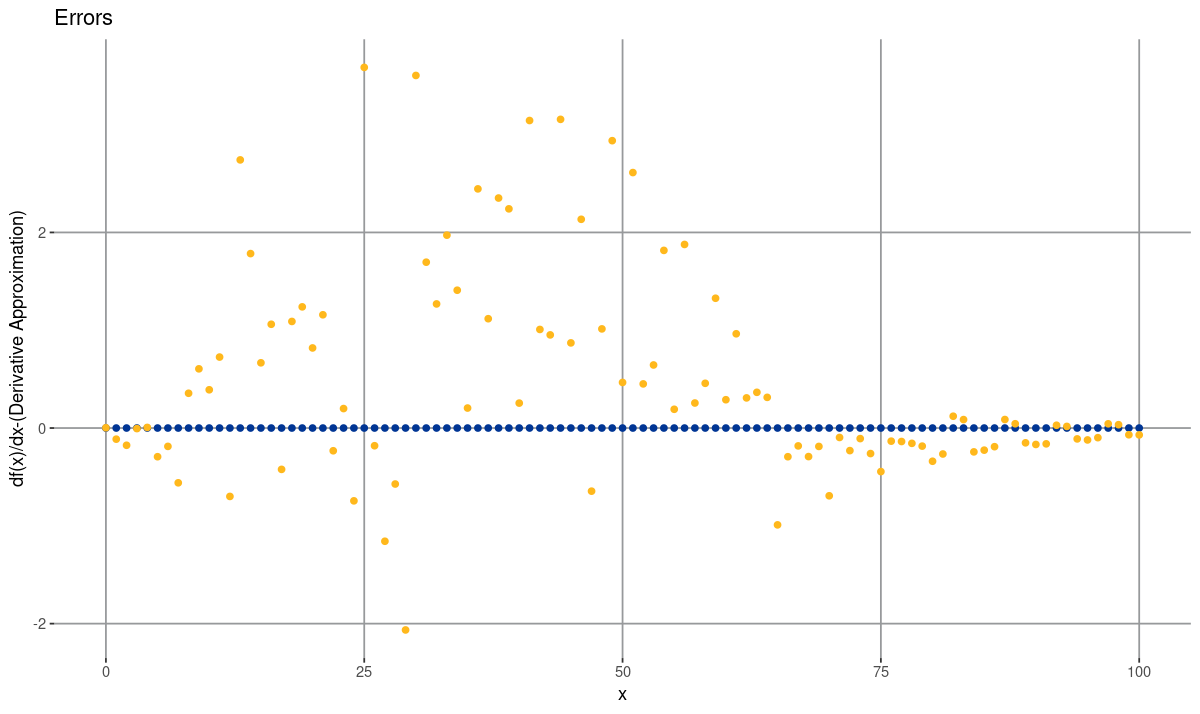

In [55]:
high.nd.med.f<- n.deriv.1(med.f,x.range,1e-14)
high.nd.med.f.error<-high.nd.med.f-d.med.f(x.range)
base+geom_point(color=Pitt.Blue,aes(x=x.range,y=c.nd.med.f.error))+ # Centered formula from before
geom_point(color=Pitt.Gold,aes(x=x.range,y=high.nd.med.f.error) )+ # The formula from our linear system
xlim(0, 100) +
ggtitle("Errors") + xlab('x') +ylab('df(x)/dx-(Derivative Approximation)')

Note that we could have changed $\mathbf{b}$ to pick out an different $D_k f$  (though we need to be careful about what we need to divide by to get the final derivative )

# Numerical Solutions to an Equation

## Non-linear Equations

Linear equations have well-defined solutions.
* We know *if* we can solve a system based on the rank of the matrix
* If it's solvable, there's a unique solution
* And we know the exact formula for this solution, through the inverse of the matrix

Non-linear equations are tougher 

While some non-linear equations do have well-defined solutions, if we can invert the non-linear part:
$$ x^4= 12\Rightarrow x = 12^{1/4} $$
others are not easily invertible
$$ x\cdot e^{x^2+3x}= 3$$

In addition, we already know that non-linear equations can admit multiple solutions!

Consider the quadratic formula. 
$$ a x^2 +bx +c =0$$
While we do have a closed form solution here, except in very special cases, there are two roots to the equation (which may or may not have real values!) from the formula:
$$ x= \frac{-b\pm\sqrt{b^2-4ac}}{2a}$$


Our aim here will be to come up with simple ways to generate numeric solutions to these non-linear problems

## Numerical Solution
There are lots of more advanced methods, but let's focus on building some intuition for how numerical solution works.

The core-method here is illustrated by the Newton-Rhapson iteration to try to solve the root of a continuous function:
$f(x)=0$

Method Procedure:
* Step 1: Guess an initial solution $x_0$
* Step 2: Figure out the value of the function at this point $f(x_0)$
* Step 3: Figure out the derivative of the funcation here $f^\prime(x_0)$

We then output a new guess
$$ x_1= x_0 - \dfrac{f(x_0)}{f^\prime(x_0)} $$

But then we can use that new guess as an input to find another:
$$ x_2= x_1 - \dfrac{f(x_1)}{f^\prime(x_1)}.$$
And so on, so the induction is that:
$$ x_{n+1}= x_n - \dfrac{f(x_n)}{f^\prime(x_n)},$$
and you stop whenever $|x_{n+1}-x_n|$ is small enough

## Example
As an example, let's consider the function:
$$ f(x)= 2 x^2 - 10 x + 3 $$

### Graphing this:
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_1.svg)

So we have $ f(x)= 2 x^2 - 10 x + 3 $, and because this is an easy function we know that $ f^\prime(x)= 4 x - 10$

Method Procedure:
* Step 1: Guess an initial solution $x_0=4$
* Step 2: Figure out the value of the function at this point $f(4)=-5$
* Step 3: Figure out the derivative of the funcation here $f^\prime(4)=6$

We then output a new guess
$$ x_1= x_0 - \dfrac{f(x_0)}{f^\prime(x_0)} = 4-\dfrac{(-5)}{6}=\frac{29}{6}$$

### Step 1 and 2:
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_2.svg)

### Zooming in
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_3.svg)

### Finding the derivative
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_4.svg)

### Putting it all together to get $x_1$
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_5.svg)

### Figure out $f(x_1)$
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_6.svg)

### Figure out $f^\prime(x_1)$ to get $x_2$
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_7.svg)

In [ ]:
newton.rhapson<-function(f,x0,tol=1e-8,eps=1e-6) { # input is a function, a start val, and optional tolerance/scale
    xx=x0  # initial value 
    fval=f(xx) 
    Error=abs(f(xx)) # how far away from zero is it!
    ii=1 # here we'll generate a counter for the number of steps
    # Repeat the steps until the error is less than the tolerance
    while (Error>tol){
        fd=n.deriv.1(f,xx,eps) # take the numeric derivative using our prev formula
        xx=xx-fval/fd # Newton-Rhapson iteration from formula
        fval=f(xx) 
        Error=abs(fval) # How far from zero now!
        ii=ii+1
    } 
    print(paste(toString(ii)," steps"))
    xx
}

In [ ]:
# Actual values from quadratic formula
actual.roots <- c( (10-sqrt(100-4*2*3))/4, (10+sqrt(100-4*2*3))/4) 
names(actual.roots)<-c("Low Root","High Root")
actual.roots
# Run our approximation
newton.rhapson(easy.f,200)

In [ ]:
actual.roots
# Run it with a higher tolerance
newton.rhapson(easy.f,4,tol=1e-12)

### What happens if we change the starting value?
![Image](https://alistairjwilson.github.io/MQE_AW/i/nr_1.svg)

In [ ]:
actual.roots
newton.rhapson(easy.f,1,tol=1e-8)

Going back to our *medium* function:

In [ ]:
base+ geom_function(fun = med.f, colour=Pitt.Blue, linewidth=1)+ 
ggtitle("Function Graph") + xlab('x') +ylab('f(x)')+xlim(0, 10)

In [ ]:
newton.rhapson(med.f ,7.5,tol=1e-8)

In [ ]:
newton.rhapson(med.f,5,tol=1e-8)

We also know that  $\left(2 x^2- 10 x+3 \right)\cdot e^{-x/10}=0$ in the limit as $x\rightarrow\infty$

In [ ]:
base+ geom_function(fun = med.f, colour=Pitt.Blue, linewidth=1)+ 
ggtitle("Function Graph") + xlab('x') +ylab('f(x)')+xlim(0, 200)

Define a new version of the function that terminates after a certain number of iterations.

In [ ]:
newton.rhapson<-function(f,x0,tol=1e-8,eps=1e-6,maxiter=50) {
    xx=x0  # initial value 
    fval=f(xx)
    Error=abs(f(xx))  # how far away from zero is it!
    ii=1 # iterator
    # Repeat the steps until the error is less than the tolerance, or we've done too many steps
    while (Error>tol & ii <maxiter ){
        fd=n.deriv.1(f,xx,eps)
        xx=xx-fval/fd # newton-rhapson iterator
        fval=f(xx)
        Error=abs(fval)
        ii=ii+1
        if (i>10) print(i)
    } 
    if (ii>=maxiter) print("Exited due to non-convergence") # print a warning if too many steps 
    print(paste(toString(ii)," steps"))
    xx
}

In [ ]:
newton.rhapson(med.f,90,tol=1e-32)

In [ ]:
med.f.2<-function(x) med.f(x)+1
base+ geom_function(fun = med.f.2, colour=Pitt.Blue, linewidth=1)+ 
ggtitle("Function Graph") + xlab('x') +ylab('f(x)')+xlim(10, 415)

In [ ]:
med.f.2(1000000000)

In [ ]:
newton.rhapson(med.f.2,1 , 90)

In [ ]:
newton.rhapson<-function(f,x0,tol=1e-8,eps=1e-6,maxiter=50) {
    xx=x0  # initial value 
    fval=f(xx)
    Error=abs(f(xx))  # how far away from zero is it!
    ii=1 # iterator
    nan.catch=0
    # Repeat the steps until the error is less than the tolerance, or we've done too many steps
    while (Error>tol & ii <maxiter &  nan.catch==0){
        fd=n.deriv.1(f,xx,eps)
        print(c(xx,fd))
        if (is.nan(fd)){
            nan.catch=1
            print("Derivative not defined")
        }
        else {
            xx=xx-fval/fd # newton-rhapson iterator
            fval=f(xx)
            Error=abs(fval)
            ii=ii+1
            }
    } 
    if (ii>=maxiter) print("Exited due to non-convergence") # print a warning if too many steps 
    print(paste(toString(ii)," steps"))
    xx
}

In [ ]:
newton.rhapson(med.f,90,tol=1e-8, maxiter=10)
newton.rhapson(med.f,90,tol=1e-8)

Obviously, we shouldn't try to reinvent the wheel here. There are many other solvers which use other clever methods to find roots.

However, sometimes we need to know what we're doing when we use them

In [ ]:
#install.packages('rootSolve')
library(rootSolve)

In [82]:
eq<-multiroot(med.f.2, start =-100:100,rtol=1e-12,atol=1e-8)

Warning message in stode(y, times, func, parms = parms, ...):
“error during factorisation of matrix (dgefa);         singular matrix”


diagonal element is zero 
[1] 124


Warning message in stode(y, times, func, parms = parms, ...):
“steady-state not reached”


In [83]:
unique(round(eq$root,5))

[1]  -91.63327  -90.64672  -89.66040  -88.67431  -87.68845  -86.70283
  [7]  -85.71746  -84.73235  -83.74749  -82.76290  -81.77859  -80.79456
 [13]  -79.81081  -78.82737  -77.84423  -76.86140  -75.87890  -74.89673
 [19]  -73.91491  -72.93343  -71.95232  -70.97157  -69.99122  -69.01126
 [25]  -68.03170  -67.05257  -66.07387  -65.09562  -64.11783  -63.14052
 [31]  -62.16369  -61.18738  -60.21159  -59.23634  -58.26166  -57.28755
 [37]  -56.31405  -55.34117  -54.36893  -53.39735  -52.42647  -51.45631
 [43]  -50.48689  -49.51825  -48.55040  -47.58339  -46.61725  -45.65201
 [49]  -44.68770  -43.72437  -42.76206  -41.80081  -40.84066  -39.88166
 [55]  -38.92387  -37.96734  -37.01213  -36.05829  -35.10589  -34.15500
 [61]  -33.20570  -32.25806  -31.31216  -30.36810  -29.42597  -28.48587
 [67]  -27.54791  -26.61222  -25.67891  -24.74813  -23.82001  -22.89473
 [73]  -21.97245  -21.05336  -20.13766  -19.22558  -18.31735  -17.41324
 [79]  -16.51354  -15.61856  -14.72866  -13.84423  -12.96569  -12.09352
 [85]  -11.22826  -10.37051   -9.52095   -8.68036   -7.84963   -7.02980
 [91]   -6.22207   -5.42788   -4.64898   -3.88754   -3.14634   -2.42912
 [97]   -1.74118   -1.09074   -0.49200    0.02612    0.38835    0.29185
[103]   -5.07145    5.63798    4.53972    4.52075    4.65423    4.78431
[109]    4.85056    4.81299    4.63359    4.26809    3.65932    2.72874
[115]    1.36316   -0.60821   -3.45692   -7.64343  -14.01675  -24.33487
[121]  -42.92672  -84.10250 -240.07767  787.52177  192.36787  123.56141
[127]   97.51379   84.15070   76.24519   71.18430   67.79369   65.46733
[133]   63.86084   62.76407   62.04146   61.60169   61.38099   61.33347
[139]   61.42531   61.63098   61.93091   62.30983   62.75563   63.25863
[145]   63.81099   64.40629   65.03924   65.70542   66.40117   67.12338
[151]   67.86943   68.63710   69.42450   70.23001   71.05226   71.89007
[157]   72.74245   73.60855   74.48766   75.37919   76.28266   77.19768
[163]   78.12396   79.06128   80.00951   80.96859   81.93852   82.91940
[169]   83.91136   84.91462   85.92946   86.95624   87.99539   89.04739
[175]   90.11283   91.19235   92.28669   93.39668   94.52324   95.66738
[181]   96.83024   98.01304   99.21717  100.44412  101.69552  102.97318
[187]  104.27906  105.61529  106.98422  108.38841  109.83062  111.31390
[193]  112.84155  114.41716  116.04465  117.72829  119.47272  121.28300
[199]  123.16463  125.12360  127.16644